Display 2 piecharts showing:

1) The Year-end contribution of each Product, in terms of total_units_sold
2) The contribution of each Month, towards total_year-end_profit

In [99]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [100]:
df = pd.read_csv('./company_sales_data.csv')

df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


In [101]:
df.columns

Index(['month_number', 'facecream', 'facewash', 'toothpaste', 'bathingsoap',
       'shampoo', 'moisturizer', 'total_units', 'total_profit'],
      dtype='object')

In [102]:
total_unit_sold = df['total_units'].sum()

total_unit_sold

312330

solution 1

In [103]:
needed_columns = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']

data = []

for column in needed_columns:
    data.append(df[column].sum() / total_unit_sold)

data

[0.11039605545416707,
 0.059280248455159605,
 0.22383376556846923,
 0.3650305766336887,
 0.0813562578042455,
 0.059280248455159605]

([<matplotlib.patches.Wedge at 0x30751fb10>,
 [Text(1.0191857210448148, 0.41383627924381056, 'facecream'),
  Text(0.6140656340963603, 0.912646370190467, 'facewash'),
  Text(-0.42521110485066355, 1.0144927384223499, 'toothpaste'),
  Text(-0.6978922003796114, -0.85026259276138, 'bathingsoap'),
  Text(0.8424026170852732, -0.7073597604669656, 'shampoo'),
  Text(1.0764906937107435, -0.2262029760064236, 'moisturizer')],
 [Text(0.5559194842062626, 0.22572887958753302, '12.28%'),
  Text(0.33494489132528743, 0.497807111012982, '6.59%'),
  Text(-0.23193332991854373, 0.5533596755030998, '24.89%'),
  Text(-0.3806684729343334, -0.4637795960516618, '40.60%'),
  Text(0.4594923365919671, -0.3858325966183448, '9.05%'),
  Text(0.5871767420240418, -0.12338344145804923, '6.59%')])

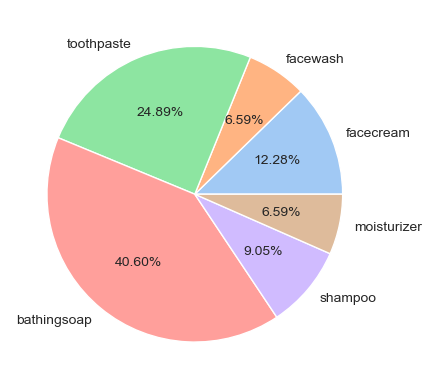

In [104]:
plt.pie(
    data,
    labels=needed_columns,
    autopct='%1.2f%%',
    colors=sns.color_palette("pastel", len(needed_columns)),
)

solution 

The contribution of each Month, towards total_year-end_profit

In [105]:
df.columns

Index(['month_number', 'facecream', 'facewash', 'toothpaste', 'bathingsoap',
       'shampoo', 'moisturizer', 'total_units', 'total_profit'],
      dtype='object')

In [106]:
total_profit_made = df['total_profit'].sum()

total_profit_made

3123300

In [107]:
months = df['month_number'].unique()

months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [108]:
data = []

for month in months:
    profit_sum = df[df['month_number'] == month].total_profit / total_profit_made
    data.append(profit_sum[month - 1])

data

[0.06755675087247463,
 0.058687926231870136,
 0.07194313706656422,
 0.07130278871706208,
 0.06710850702782313,
 0.06448307879486441,
 0.09461146863893959,
 0.11571094675503474,
 0.07492075689174911,
 0.08539045240610893,
 0.13216789933723946,
 0.09611628726026959]

In [109]:
import calendar

month_names = [calendar.month_name[month] for month in months]


([<matplotlib.patches.Wedge at 0x3075fddd0>,
 [Text(1.075318635275667, 0.23171066576417557, 'January'),
  Text(0.90233994698432, 0.6291125655050414, 'February'),
  Text(0.5764196757176353, 0.9368779842890835, 'March'),
  Text(0.11150354434326144, 1.0943340256059346, 'April'),
  Text(-0.35986978209540105, 1.0394680081342613, 'May'),
  Text(-0.7471407332350172, 0.8073293780985807, 'June'),
  Text(-1.0426655108453784, 0.35049769256522423, 'July'),
  Text(-1.0383225812609915, -0.36316142036773674, 'August'),
  Text(-0.6528938314691488, -0.8852850641626882, 'September'),
  Text(-0.14457981250945956, -1.0904570958156627, 'October'),
  Text(0.5765138806974432, -0.9368200175931204, 'November'),
  Text(1.0502315577268, -0.32712944709203373, 'December')],
 [Text(0.586537437423091, 0.12638763587136848, '6.76%'),
  Text(0.4921854256278108, 0.3431523084572952, '5.87%'),
  Text(0.3144107322096192, 0.5110243550667728, '7.19%'),
  Text(0.060820115096324415, 0.596909468512328, '7.13%'),
  Text(-0.19629

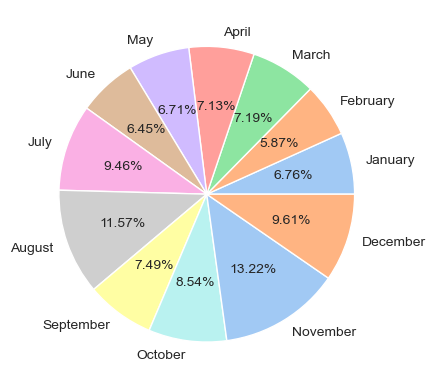

In [111]:
plt.pie(
    data,
    labels=month_names,
    autopct='%1.2f%%',
    colors=sns.color_palette('pastel')[:len(months)]
)